# Visualise the images and landmarks

In [1]:
%matplotlib inline
import os, glob
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [2]:
img_ref = plt.imread('Rat_Kidney_Section05_HE.jpg')
lnds_ref = pd.DataFrame().from_csv('Rat_Kidney_Section05_HE.csv').values
img_move = plt.imread('Rat_Kidney_Section09_PanCytokeratin.jpg')
lnds_move = pd.DataFrame().from_csv('Rat_Kidney_Section09_PanCytokeratin.csv').values

/home.dokt/borovji3/TEMP/vEnv3/lib/python3.4/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
/home.dokt/borovji3/TEMP/vEnv3/lib/python3.4/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


## Input images

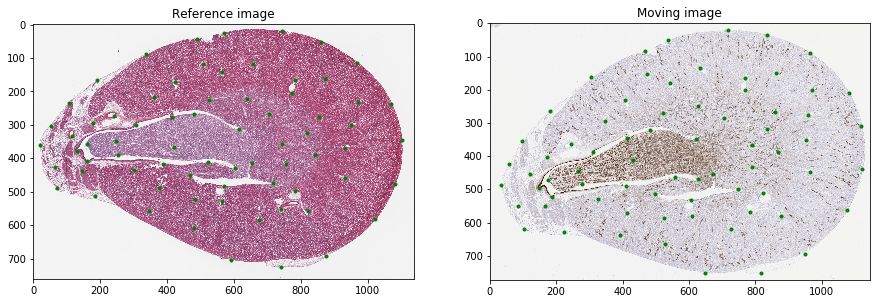

In [7]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1), plt.title('Reference image'), plt.imshow(img_ref)
plt.plot(lnds_ref[:, 0], lnds_ref[:, 1], 'g.')
plt.subplot(1, 2, 2), plt.title('Moving image'), plt.imshow(img_move)
plt.plot(lnds_move[:, 0], lnds_move[:, 1], 'g.')

Compute diferences

((0, 70), None)

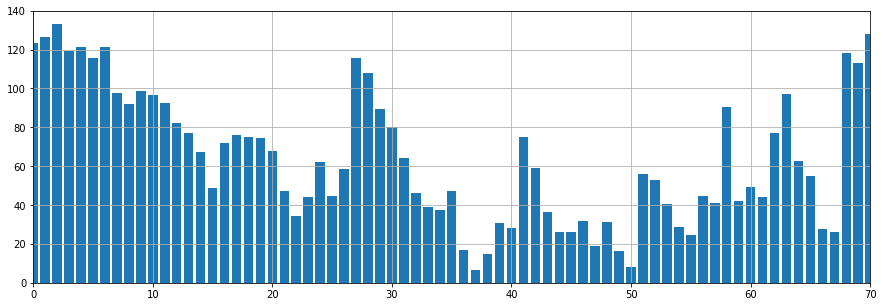

In [8]:
diffs = np.sqrt(np.sum((lnds_ref - lnds_move) ** 2, axis=1))

plt.figure(figsize=(15, 5))
plt.bar(range(len(diffs)), diffs)
plt.xlim([0, len(diffs) - 1]), plt.grid()

In [9]:
print ('inaccuracy [px]:', np.mean(diffs))
diag = np.sqrt(np.sum(np.mean([img_ref.shape, img_move.shape], axis=0)[:2] ** 2))
print ('image diagonal [px]:', diag)
print ('inaccuracy [%]:', 100. * np.mean(diffs) / diag)

inaccuracy [px]: 63.98449767358105
image diagonal [px]: 1375.385854951257
inaccuracy [%]: 4.652112528512854


## Registration results

execte the registration on these images with benchmark script:

**julia benchmark.jl moving_image static_image output_dir parameters static_image_landmarks**

../julia_v0.6.2/bin/julia benchmark.jl samples/Rat_Kidney_Section09_PanCytokeratin.jpg samples/Rat_Kidney_Section05_HE.jpg res/ params_rigid.txt samples/Rat_Kidney_Section05_HE.txt

In [12]:
p_res = os.path.abspath('../res')
print (glob.glob(os.path.join(p_res, '*')))

['/mnt/datagrid/personal/borovec/Repos/segregjl/res/time.txt', '/mnt/datagrid/personal/borovec/Repos/segregjl/res/registered.png', '/mnt/datagrid/personal/borovec/Repos/segregjl/res/landmarks.txt']


In [26]:
img_warp = plt.imread(os.path.join(p_res, 'registered.png'))
with open(os.path.join(p_res, 'landmarks.txt'), 'r') as fp:
    lnds_lines = fp.readlines()
lnds_warp = np.array([list(map(float, line.split(' '))) for line in lnds_lines[2:]])

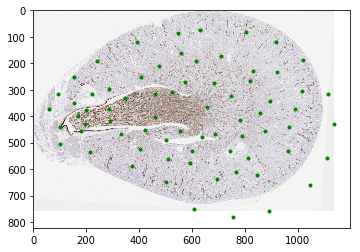

In [42]:
plt.imshow(img_warp)
plt.plot(lnds_warp[:, 0], lnds_warp[:, 1], 'g.')

Ovelap warped image ove refenece and moving

(<matplotlib.image.AxesImage at 0x7f7a7ab943c8>,
 <matplotlib.image.AxesImage at 0x7f7a7ab66208>)

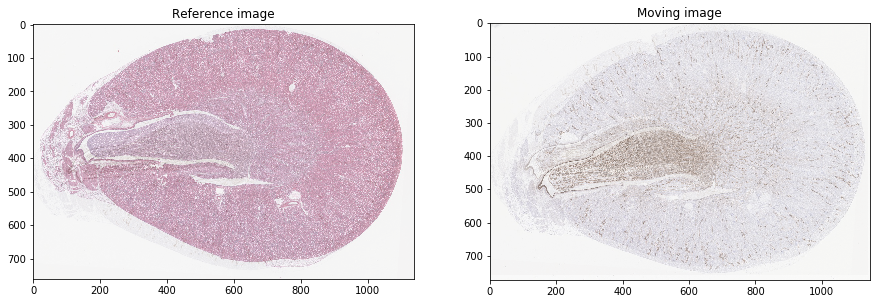

In [31]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1), plt.title('Reference image')
plt.imshow(img_warp, alpha=0.5), plt.imshow(img_ref, alpha=0.5)
plt.subplot(1, 2, 2), plt.title('Moving image')
plt.imshow(img_warp, alpha=0.5), plt.imshow(img_move, alpha=0.5)

Compute some statisc on landmarks

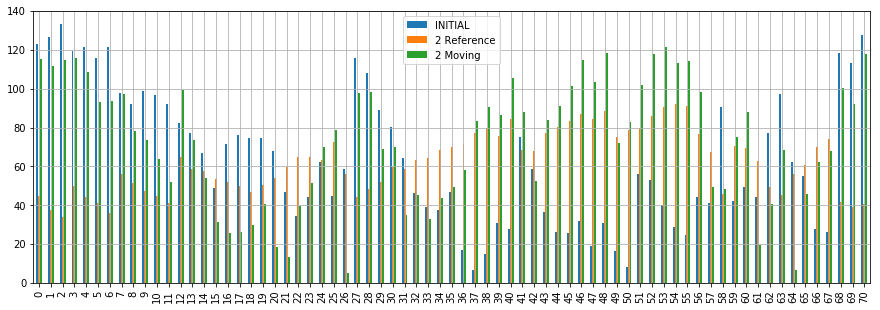

In [54]:
diffs_2ref = np.sqrt(np.sum((lnds_ref - lnds_warp) ** 2, axis=1))
diffs_2move = np.sqrt(np.sum((lnds_move - lnds_warp) ** 2, axis=1))
# plt.figure(figsize=(15, 5))
# plt.bar(range(len(diffs)), diffs, label='Initial', alpha=0.5) # , 'g'
# plt.bar(range(len(diffs)), diffs_2ref, label='to Reference', alpha=0.5) # , 'g'
# plt.bar(range(len(diffs)), diffs_2move, label='to Moving', alpha=0.5) # , 'b'
# plt.xlim([0, len(diffs) - 1]), plt.grid(), plt.legend()

df_diffs = pd.DataFrame(np.array([diffs, diffs_2ref, diffs_2move]).T, columns=['INITIAL', '2 Reference', '2 Moving'])
df_diffs.plot(figsize=(15, 5), kind='bar', grid=True, legend=True)

In [55]:
list_res = [{'[px]': np.mean(d), '[%]': 100. * np.mean(d) / diag} for d in [diffs, diffs_2ref, diffs_2move]]
df_res = pd.DataFrame(list_res, index=['INITIAL', '2 Reference', '2 Moving'])
print (df_res)

                  [%]       [px]
INITIAL      4.652113  63.984498
2 Reference  4.652113  62.169632
2 Moving     4.652113  73.199781
